<a href="https://colab.research.google.com/github/Basoski/Python/blob/main/SimpleLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import torch
import torch.nn
import matplotlib.pyplot as plt

In [61]:
torch.manual_seed(42)
sample_size = (700,1)
n_input = 2

# Real model
weights = torch.tensor([3.5, -1.2], dtype= torch.float32)
bias = torch.tensor(0.7, dtype = torch.float32)
noise = 0.3*torch.randn(sample_size)

inputs = []
for i in range(n_input):
  inputs.append(torch.empty(sample_size).uniform_(-2,2))
X = torch.cat([inputs[i] for i in range(n_input)], dim=1)

# X.shape = (700 , 2)
# weights = (2) --> weights.unsqueeze(1) = (2,1)
# bias = (700,1)
# noise = (700,1)
# (700,2) @ (2,1) + (700,1) + (700,1) = (700,1)


print(X.shape)
print(weights.unsqueeze(1).shape)

y = X @ weights.unsqueeze(1) + bias + noise

torch.Size([700, 2])
torch.Size([2, 1])


## Train test split

In [62]:
train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(489, 489, 211, 211)

## Plot function

In [63]:
def plot_ytrue_vs_ypred(y_true, y_pred):
  yt = y_true.squeeze(-1) # squeeze will return a tensor with the dimension indicated by the input removed. In this cae, -1 means the last dimension
  yp = y_pred.squeeze(-1)

  lo = float(min(yt.min(), yp.min()))
  hi = float(max(yt.max(), yp.max()))

  plt.figure(figsize=(7,7))
  plt.scatter(yt, yp, s=6, label="Predictions")
  plt.plot([lo,hi], [lo,hi], linewidth=1)
  plt.xlabel=("y true")
  plt.ylabel=("y pred")
  plt.legend()
  plt.show()

## Model definition

In [64]:
class SimpleLinearModel(torch.nn.Module):
  def __init__(self, in_features = 2, out_features = 1, bias=True):
    super().__init__()
    self.linear = torch.nn.Linear(in_features, out_features, bias)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear(x)


In [65]:
model = SimpleLinearModel(2,1,bias=True)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.05)

## Training loop

In [66]:
epochs = 500

train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    y_test_pred = model(X_test)
    loss_test = loss_fn(y_test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_losses.append(loss.detach().numpy())
      test_losses.append(loss_test.detach().numpy())
      print(f"Epoch: {epoch} | MSE Loss Train: {loss} | MSE Loss Test: {loss_test}")

Epoch: 0 | MSE Loss Train: 15.421295166015625 | MSE Loss Test: 15.969823837280273
Epoch: 10 | MSE Loss Train: 9.987427711486816 | MSE Loss Test: 10.087449073791504
Epoch: 20 | MSE Loss Train: 6.115053176879883 | MSE Loss Test: 6.085951328277588
Epoch: 30 | MSE Loss Train: 3.536525011062622 | MSE Loss Test: 3.4914989471435547
Epoch: 40 | MSE Loss Train: 1.9678179025650024 | MSE Loss Test: 1.9059339761734009
Epoch: 50 | MSE Loss Train: 1.0550261735916138 | MSE Loss Test: 1.0086150169372559
Epoch: 60 | MSE Loss Train: 0.5404091477394104 | MSE Loss Test: 0.5181773900985718
Epoch: 70 | MSE Loss Train: 0.2724606990814209 | MSE Loss Test: 0.2676490843296051
Epoch: 80 | MSE Loss Train: 0.15075452625751495 | MSE Loss Test: 0.1542278528213501
Epoch: 90 | MSE Loss Train: 0.10412082076072693 | MSE Loss Test: 0.1096455529332161
Epoch: 100 | MSE Loss Train: 0.08928871899843216 | MSE Loss Test: 0.09519526362419128
Epoch: 110 | MSE Loss Train: 0.08559669554233551 | MSE Loss Test: 0.091437429189682
Epo

## Loss plot

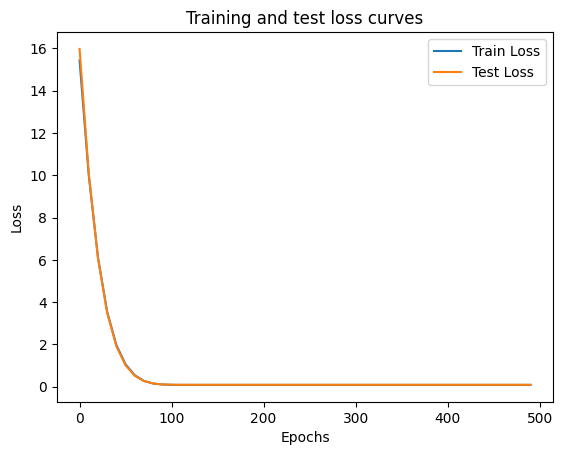

In [68]:
plt.plot(epoch_count, train_losses, label="Train Loss")
plt.plot(epoch_count, test_losses, label ="Test Loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [70]:
print(f"Real parameters: w1 = 3.5, w2 = -1.2, b = 0.7")
print(f"Learned parameters: {model.state_dict()}")


Learned parameters: OrderedDict({'linear.weight': tensor([[ 3.5002, -1.2029]]), 'linear.bias': tensor([0.7100])})


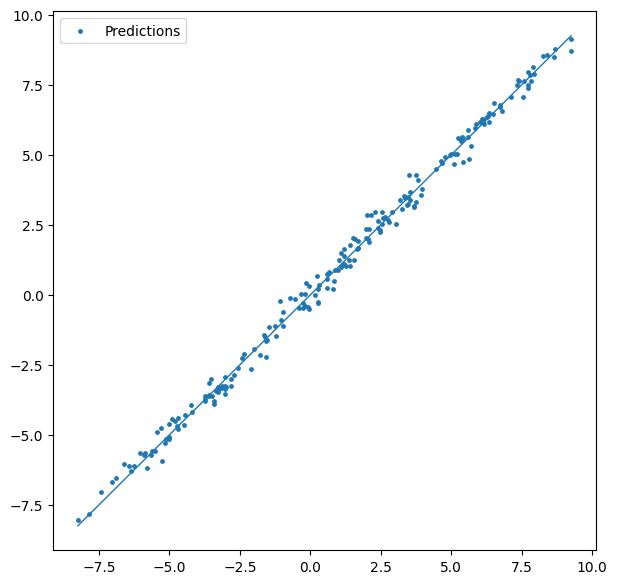

In [71]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

plot_ytrue_vs_ypred(y_test, y_preds)